In [60]:
import helperfunction as hf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import pandas as pd

In [2]:
invoice_df = hf.create_df('invoice_data')
invoice_df.head()

Current work Directory C:\Users\jahna\OneDrive\Documents\GitHub\Customer-Segmentation\Code
File Path is  C:\Users\jahna\OneDrive\Documents\GitHub\Customer-Segmentation\Code\invoice_data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
print(f"Total observations (records): {invoice_df.shape[0]}")
print(f"\nTotal features: {invoice_df.shape[1]}")
print(f"\nNumber of Invoices: {invoice_df['InvoiceNo'].nunique()}")
print(f"\nNumber of Products: {invoice_df['StockCode'].nunique()}")
print(f"\nNumber of Customers: {invoice_df['CustomerID'].nunique()}")
print(f"\nNumber of Countries: {invoice_df['Country'].nunique()}")
print(f"\nMinimum Date: {invoice_df['InvoiceDate'].min()} - Maximum Date: {invoice_df['InvoiceDate'].max()}")

Total observations (records): 541909

Total features: 8

Number of Invoices: 25900

Number of Products: 4070

Number of Customers: 4372

Number of Countries: 38

Minimum Date: 2010-12-01 08:26:00 - Maximum Date: 2011-12-09 12:50:00


In [32]:
invoice_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
invoice_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [34]:
invoice_df[(invoice_df.UnitPrice<0) & (invoice_df.Quantity<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [35]:
invoice_df['price'] = invoice_df['Quantity']*invoice_df['UnitPrice']
a = invoice_df[['InvoiceNo','price']].groupby(['InvoiceNo']).sum().reset_index()
print(f"\nMin Basket Price: {a.price.min()}")
print(f"Max Basket Price: {a.price.max()}")


Min Basket Price: -168469.6
Max Basket Price: 168469.6


In [36]:
a = invoice_df[['CustomerID','price']].groupby(['CustomerID']).sum().reset_index()
print(a.sort_values(by='price', ascending=0).head())
print(f"\nMin Purchase by customer: {a.price.min()}")
print(f"Max Purchase customer: {a.price.max()}")

      CustomerID      price
1703     14646.0  279489.02
4233     18102.0  256438.49
3758     17450.0  187482.17
1895     14911.0  132572.62
55       12415.0  123725.45

Min Purchase by customer: -4287.63
Max Purchase customer: 279489.02


In [37]:
result = invoice_df.groupby('CustomerID')['InvoiceDate'].agg(['first', 'last'])
result['Date_Difference'] = result['last'] - result['first']
print(f"\nAvg customer span: {result['Date_Difference'].mean()}")


Avg customer span: 133 days 17:25:29.204025618


In [38]:
a = invoice_df[['InvoiceNo','Quantity']].groupby(['InvoiceNo']).sum().reset_index()
print(f"\nMin Quantity by InvoiceNo: {a.Quantity.min()}")
print(f"Max Quantity by InvoiceNo: {a.Quantity.max()}")


Min Quantity by InvoiceNo: -80995
Max Quantity by InvoiceNo: 80995


# PreProcessing

## Data Cleaning

### Handling Missing Values

In [3]:
print(f"Number of observations with NULL CustomerID: {invoice_df[invoice_df.CustomerID.isnull()].shape[0]}")

Number of observations with NULL CustomerID: 135080


In [4]:
null_cust_df = invoice_df[invoice_df.CustomerID.isnull()]
null_cust_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [5]:
hf.print_observation("There are valid invoices without customer ID")

OBSERVATION:  There are valid invoices without customer ID


In [6]:
invoice_df.dropna(subset=['CustomerID'], inplace=True)
print("Number of Records after dropping Null CustomerID", invoice_df.shape)

Number of Records after dropping Null CustomerID (406829, 8)


### Checking for Duplicates
Defining Duplicates as entrees which have the same Invoice No, StockCode and Quantity

In [9]:
duplicates = invoice_df[invoice_df.duplicated(subset=['InvoiceNo', "StockCode", "Quantity"])]
print("Number of Duplicates in the Dataset", duplicates.shape)

Number of Duplicates in the Dataset (5281, 8)


In [11]:
invoice_df = invoice_df.drop_duplicates(subset=['InvoiceNo', "StockCode", "Quantity"])
print("Number of Records after dropping duplicates", invoice_df.shape)

Number of Records after dropping duplicates (401548, 8)


In [12]:
invoice_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# EDA

## Countries

In [40]:
temp = invoice_df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No Of Countries : {}'.format(len(countries)))

No Of Countries : 37


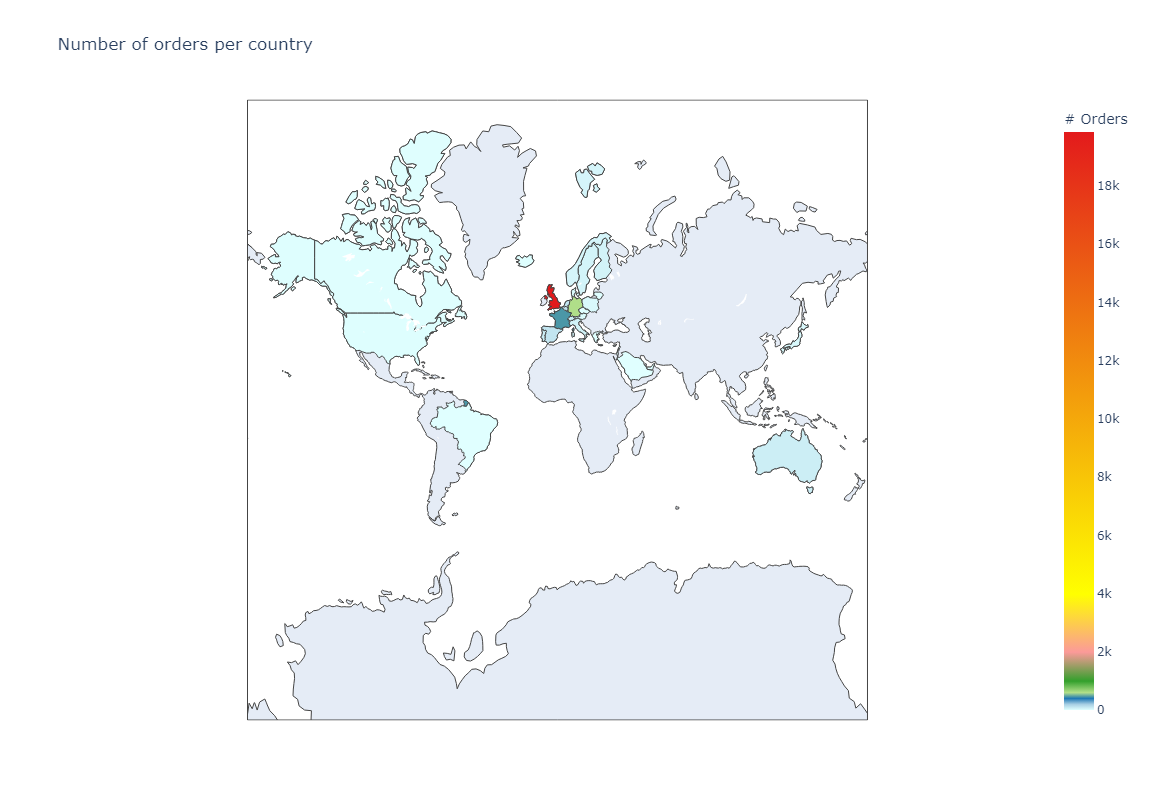

In [50]:
data = dict(
    type='choropleth',
    locations=countries.index,
    locationmode='country names',
    z=countries,
    text=countries.index,
    colorbar={'title': '# Orders'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)

layout = dict(
    title='Number of orders per country',
    geo=dict(showframe=True, projection={'type': 'mercator'}),
    width=1000,  # Adjust the width of the plot
    height=800   # Adjust the height of the plot
)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

## Stock Code

In [51]:
list_special_codes = invoice_df[invoice_df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [52]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, invoice_df[invoice_df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


## Price

In [41]:
neg_invoice_df = invoice_df[invoice_df.price<0]
pos_invoice_df = invoice_df[invoice_df.price<0]
print(neg_invoice_df.shape)
neg_invoice_df.head()

(8905, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


In [63]:
neg_invoice_df[neg_invoice_df.InvoiceNo.str[:1] != 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


In [62]:
pos_invoice_df = invoice_df[invoice_df.price>0]
print(pos_invoice_df.shape)
pos_invoice_df.head()

(530104, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [64]:
pos_invoice_df[pos_invoice_df.InvoiceNo.str[:1] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price


In [69]:
neg_quant_invoice_df = invoice_df[(invoice_df.Quantity<0) & (invoice_df.InvoiceNo.str[:1]!='C')]
print(neg_quant_invoice_df.shape)
neg_quant_invoice_df.head()

(1336, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,-0.0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,-0.0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0


In [45]:
neg_invoice_df = neg_invoice_df.merge(invoice_df, how='left', on=['StockCode','CustomerID'])
condition1 = (abs(neg_invoice_df.price_x) == neg_invoice_df.price_y)
condition2 = (abs(neg_invoice_df.Quantity_x) == neg_invoice_df.Quantity_y)
condition3 = neg_invoice_df.InvoiceDate_x > neg_invoice_df.InvoiceDate_y
neg_invoice_df = neg_invoice_df[condition1 & condition2 & condition3]
neg_invoice_df
# neg_invoice_df.to_csv('a.csv')

,InvoiceNo_x,StockCode,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID,Country_x,price_x,InvoiceNo_y,Description_y,Quantity_y,InvoiceDate_y,UnitPrice_y,Country_y,price_y
253,C536979,84685,BEACH HUT KEY CABINET,-1,2010-12-03 14:23:00,3.75,17841.0,United Kingdom,-3.75,536557,BEACH HUT KEY CABINET,1,2010-12-01 14:41:00,3.75,United Kingdom,3.75
287,C537143,20685,DOORMAT RED RETROSPOT,-1,2010-12-05 12:58:00,7.95,12748.0,United Kingdom,-7.95,537140,DOORMAT RED RETROSPOT,1,2010-12-05 12:53:00,7.95,United Kingdom,7.95
290,C537157,35953,FOLKART STAR CHRISTMAS DECORATIONS,-24,2010-12-05 13:09:00,1.25,15880.0,United Kingdom,-30.00,537144,FOLKART STAR CHRISTMAS DECORATIONS,24,2010-12-05 13:00:00,1.25,United Kingdom,30.00
327,C537203,37449,CERAMIC CAKE STAND + HANGING CAKES,-1,2010-12-05 14:44:00,9.95,14606.0,United Kingdom,-9.95,536591,CERAMIC CAKE STAND + HANGING CAKES,1,2010-12-01 16:57:00,9.95,United Kingdom,9.95
1715,C537314,21349,IVY HEART WREATH,-4,2010-12-06 11:42:00,6.75,13497.0,United Kingdom,-27.00,537298,IVY HEART WREATH,4,2010-12-06 11:37:00,6.75,United Kingdom,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66523,C581409,23462,ROCOCO WALL MIRROR WHITE,-1,2011-12-08 14:08:00,19.95,12476.0,Germany,-19.95,578472,ROCOCO WALL MIRROR WHITE,1,2011-11-24 12:40:00,19.95,Germany,19.95
66537,C581409,85127,SMALL SQUARE CUT GLASS CANDLESTICK,-5,2011-12-08 14:08:00,4.95,12476.0,Germany,-24.75,578472,SMALL SQUARE CUT GLASS CANDLESTICK,5,2011-11-24 12:40:00,4.95,Germany,24.75
66559,C581462,16219,HOUSE SHAPE PENCIL SHARPENER,-48,2011-12-08 18:51:00,0.06,12985.0,United Kingdom,-2.88,575868,HOUSE SHAPE PENCIL SHARPENER,48,2011-11-11 12:44:00,0.06,United Kingdom,2.88
66561,C581462,21642,ASSORTED TUTTI FRUTTI PEN,-72,2011-12-08 18:51:00,0.29,12985.0,United Kingdom,-20.88,575868,ASSORTED TUTTI FRUTTI PEN,72,2011-11-11 12:44:00,0.29,United Kingdom,20.88


In [53]:
neg_invoice_df[neg_invoice_df.InvoiceNo_x.str[:1] != 'C']

,InvoiceNo_x,StockCode,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID,Country_x,price_x,InvoiceNo_y,Description_y,Quantity_y,InvoiceDate_y,UnitPrice_y,Country_y,price_y
41795,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,A563185,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom,11062.06
41798,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,A563185,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom,11062.06


In [23]:
df_check = invoice_df[invoice_df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if invoice_df[(invoice_df['CustomerID'] == col[0]) & (invoice_df['Quantity'] == -col[1]) 
                & (invoice_df['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


In [26]:
len(invoice_df["StockCode"].unique())

4070

In [27]:
len(invoice_df["Description"].unique())

4224

## Quantity

In [13]:
invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
print("Summary statistics for 'Quantity':")
print(invoice_df['Quantity'].describe())

Summary statistics for 'Quantity':
count    401548.000000
mean         12.185721
std         250.297274
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


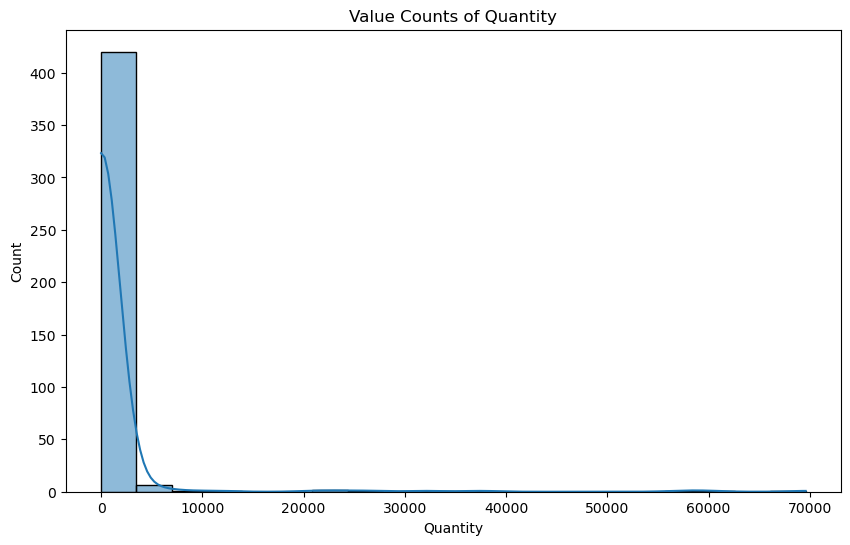

In [17]:
quantity_counts = invoice_df['Quantity'].value_counts()

# Plot the value counts
plt.figure(figsize=(10, 6))
sns.histplot(quantity_counts, bins=20, kde=True)
plt.title('Value Counts of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

In [18]:
quantity_counts

Quantity
 1        69588
 12       59827
 2        57421
 6        37480
 4        32093
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: count, Length: 436, dtype: int64

In [19]:
pos_quantity = invoice_df[invoice_df['Quantity'] >= 0]
neg_quantity = invoice_df[invoice_df['Quantity'] < 0]

### Negative Quantity

In [20]:
neg_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [21]:
neg_quantity.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,8841.000000,8841,8841.000000,8841.000000
mean,-30.794028,2011-06-27 07:09:03.108245760,18.115858,14989.692456
min,-80995.000000,2010-12-01 09:41:00,0.010000,12346.000000
25%,-6.000000,2011-03-23 08:55:00,1.450000,13505.000000
50%,-2.000000,2011-07-11 13:38:00,2.950000,14868.000000
75%,-1.000000,2011-10-06 20:36:00,4.950000,16393.000000
max,-1.000000,2011-12-09 11:58:00,38970.000000,18282.000000
std,1174.279398,NaN,444.454894,1707.903004


In [22]:
neg_quantity[~(neg_quantity['InvoiceNo'].str.contains('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
hf.print_observation("All the entrees with a negative quantity are Cancellation invoices")

OBSERVATION:  All the entrees with a negative quantity are Cancellation invoices


### Cancellation orders

In [72]:
cancelled_orders = neg_quantity.copy()

In [73]:
# Cancellation Rate
cancellation_rate = len(cancelled_orders) / len(invoice_df) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 2.20%


In [74]:
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [75]:
cancelled_orders.set_index('InvoiceDate', inplace=True)

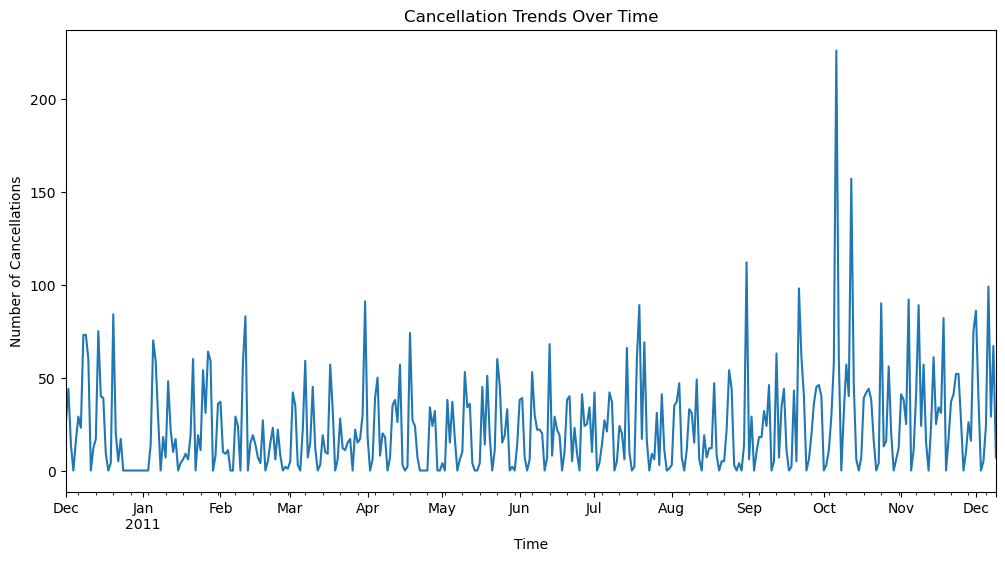

In [76]:
# Cancellation Trend
cancellation_trends = cancelled_orders.resample('D').size()
plt.figure(figsize=(12, 6))
cancellation_trends.plot(title='Cancellation Trends Over Time', ylabel='Number of Cancellations', xlabel='Time')
plt.show()

Cancellation Rate Defined as the #No. orders cancelled/Total number of order For the Given Country

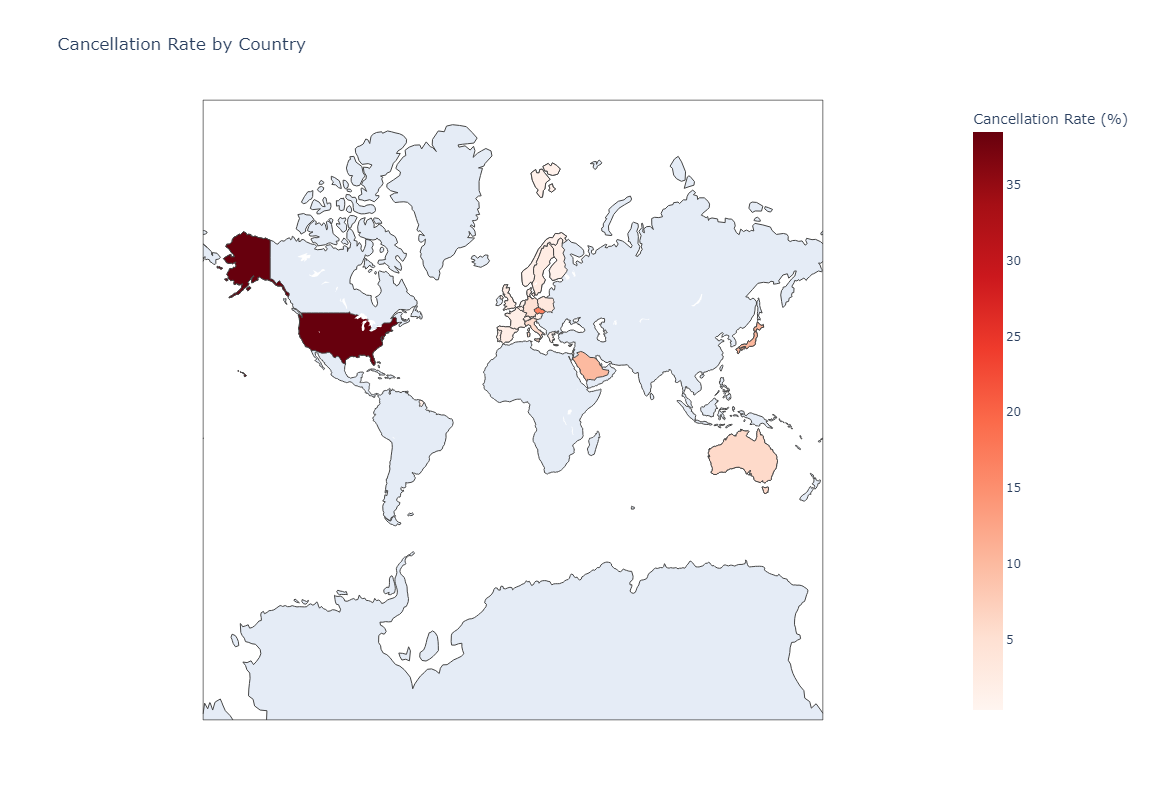

In [97]:
# Calculate cancellation rate by country
cancellation_rate_by_country = cancelled_orders.groupby('Country').size() / invoice_df.groupby('Country').size() * 100

# Create choropleth map data
map_data = dict(
    type='choropleth',
    locations=cancellation_rate_by_country.index,
    locationmode='country names',
    z=cancellation_rate_by_country,
    text=cancellation_rate_by_country.index,
    colorbar={'title': 'Cancellation Rate (%)'},
    colorscale='Reds',
    reversescale=False
)

# Create layout for the map
map_layout = dict(
    title='Cancellation Rate by Country',
    geo=dict(showframe=True, projection={'type': 'mercator'}),
    width=1000,  # Adjust the width of the plot
    height=800   # Adjust the height of the plot
)

# Create choropleth map figure
choromap = go.Figure(data=[map_data], layout=map_layout)

# Plot the map
iplot(choromap, validate=False)

In [77]:
# Impact on Revenue
total_revenue = invoice_df['UnitPrice'].sum()
cancelled_revenue = cancelled_orders['UnitPrice'].sum()
revenue_impact = (cancelled_revenue / total_revenue) * 100
print(f"Impact on Revenue: {revenue_impact:.2f}%")

Impact on Revenue: 11.61%


In [87]:
# Customer Analysis
customer_analysis = cancelled_orders.groupby('CustomerID').size().reset_index(name='CancellationCount')
print("Customer Analysis:")
print(customer_analysis)

Customer Analysis:
      CustomerID  CancellationCount
0        12346.0                  1
1        12352.0                  9
2        12359.0                  6
3        12362.0                  8
4        12365.0                  1
...          ...                ...
1584     18272.0                  4
1585     18274.0                 11
1586     18276.0                  2
1587     18277.0                  1
1588     18282.0                  1

[1589 rows x 2 columns]


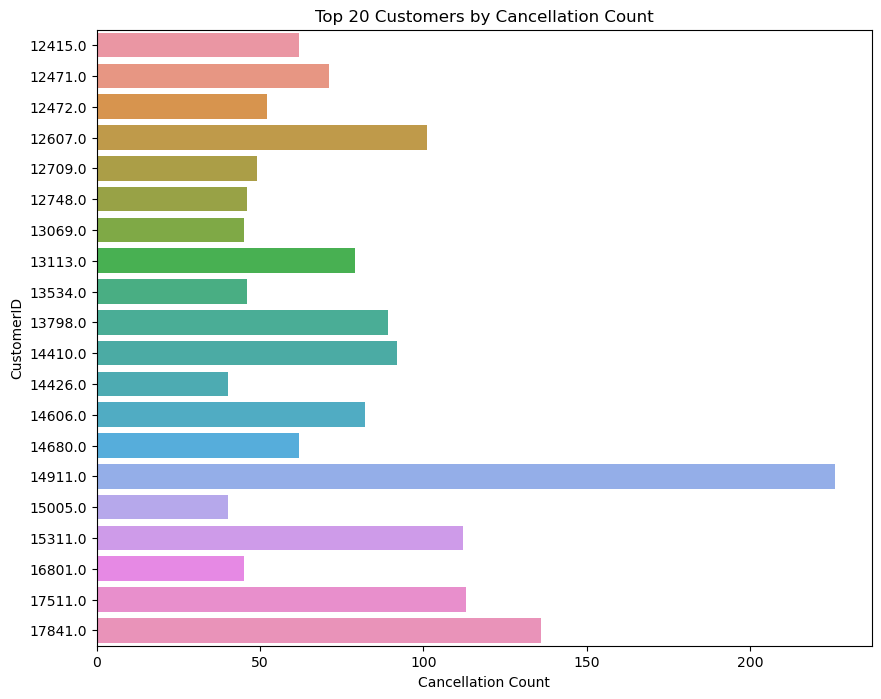

In [88]:
top_customers = customer_analysis.sort_values(by='CancellationCount', ascending=False).head(20)

# Visualize Top 20 Customers with horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(y='CustomerID', x='CancellationCount', data=top_customers, orient='h')
plt.title('Top 20 Customers by Cancellation Count')
plt.xlabel('Cancellation Count')
plt.ylabel('CustomerID')
plt.show()

In [95]:
# Product Analysis
product_analysis = cancelled_orders.groupby('StockCode').size().reset_index(name='CancellationCount')
top_products = product_analysis.sort_values(by='CancellationCount', ascending=False).head(20)

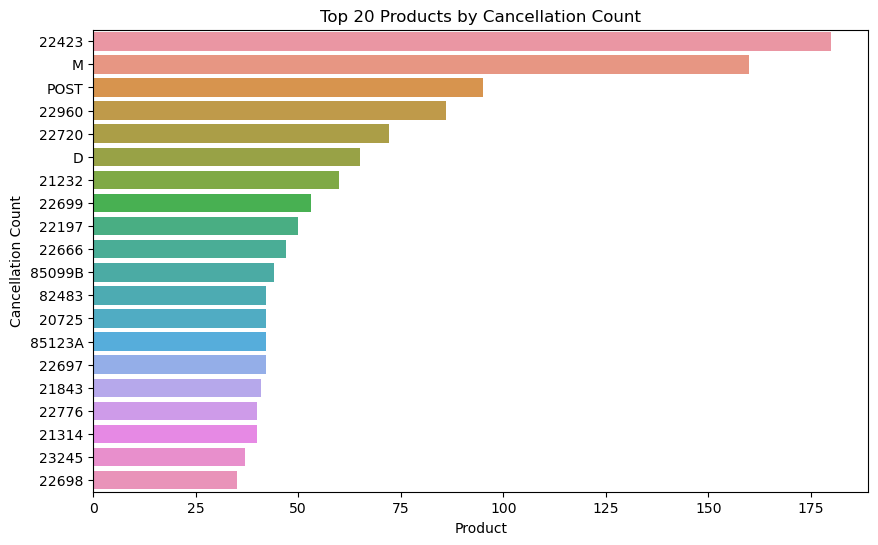

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(y='StockCode', x='CancellationCount', data=top_products, orient='h')
plt.title('Top 20 Products by Cancellation Count')
plt.xlabel('Product')
plt.ylabel('Cancellation Count')
plt.show()

### Positive Quantity

In [24]:
pos_quantity.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392707.000000,392707,392707.000000,392707.000000
mean,13.153323,2011-07-10 19:17:13.836881152,3.105738,15287.814090
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.593481,NaN,21.518832,1713.539957


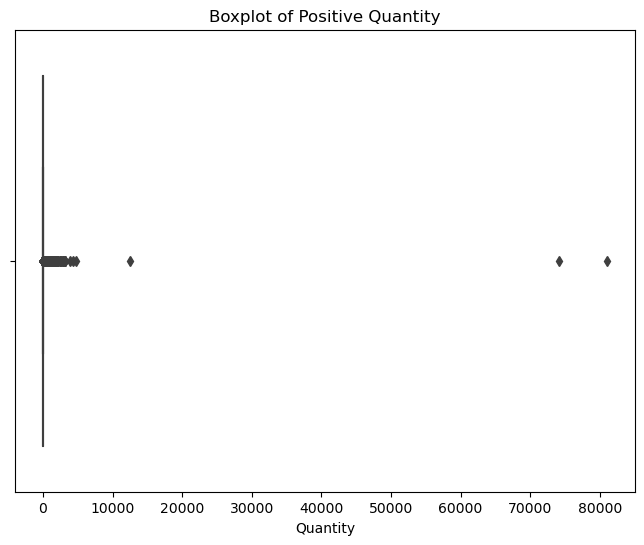

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=pos_quantity['Quantity'])
plt.title('Boxplot of Positive Quantity')
plt.xlabel('Quantity')
plt.show()

In [28]:
# TODO: Outliers?

In [29]:
pos_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Product Categories

## Clustering Products 

## Silhoutte Intra cluster score

## PCA

# Customer Categories

# Classification on Customers